In [ ]:
import pandas as pd
df = pd.read_csv('dataset_dataclass.csv')
df.head()

,file,project,version,loc,lloc,sloc,comments,multi,blank,cyclo,...,V,D,E,T,B,cbo,lcom,DIT,rfc,DataClass
0,coba.py,django-2.2,2.2,6.0,3.0,3.0,1.0,0.0,2.0,0.0,...,0.000,0.000,0.000,0.000,0.000000,0.0,0.0,0.0,0.0,0
1,setup.py,django-2.2,2.2,138.0,30.0,104.0,9.0,0.0,25.0,1.0,...,39.863,2.667,106.302,5.906,0.013288,0.0,0.0,0.0,0.0,0
2,django\shortcuts.py,django-2.2,2.2,158.0,62.0,66.0,9.0,52.0,31.0,23.0,...,116.692,2.125,247.971,13.776,0.038897,0.0,0.0,0.0,0.0,0
3,django\__init__.py,django-2.2,2.2,24.0,13.0,14.0,0.0,5.0,5.0,3.0,...,4.755,0.500,2.377,0.132,0.001585,0.0,0.0,0.0,0.0,0
4,django\__main__.py,django-2.2,2.2,9.0,4.0,3.0,0.0,4.0,2.0,0.0,...,4.755,0.500,2.377,0.132,0.001585,0.0,0.0,0.0,0.0,0


# **PREPROCESING**

In [ ]:
df['project'] = df['project'].str.replace(r'-.*$', '', regex=True)

In [ ]:
df.head()

,file,project,version,loc,lloc,sloc,comments,multi,blank,cyclo,...,V,D,E,T,B,cbo,lcom,DIT,rfc,DataClass
0,coba.py,django,2.2,6.0,3.0,3.0,1.0,0.0,2.0,0.0,...,0.000,0.000,0.000,0.000,0.000000,0.0,0.0,0.0,0.0,0
1,setup.py,django,2.2,138.0,30.0,104.0,9.0,0.0,25.0,1.0,...,39.863,2.667,106.302,5.906,0.013288,0.0,0.0,0.0,0.0,0
2,django\shortcuts.py,django,2.2,158.0,62.0,66.0,9.0,52.0,31.0,23.0,...,116.692,2.125,247.971,13.776,0.038897,0.0,0.0,0.0,0.0,0
3,django\__init__.py,django,2.2,24.0,13.0,14.0,0.0,5.0,5.0,3.0,...,4.755,0.500,2.377,0.132,0.001585,0.0,0.0,0.0,0.0,0
4,django\__main__.py,django,2.2,9.0,4.0,3.0,0.0,4.0,2.0,0.0,...,4.755,0.500,2.377,0.132,0.001585,0.0,0.0,0.0,0.0,0


In [ ]:
df.isnull().sum()

,0
file,0
project,0
version,0
loc,0
lloc,0
sloc,0
comments,0
multi,0
blank,0
cyclo,0


# **SPLITTING DATASET**

In [ ]:
from sklearn.model_selection import train_test_split

meta = df[["file", "version", "project"]]

X = df.drop(columns=["file", "version", "project", "DataClass"])
y = df["DataClass"]

X_train, X_test, y_train, y_test, meta_train, meta_test = train_test_split(
    X, y, meta, test_size=0.2, random_state=42, shuffle=True, stratify=y
)

print("Fitur final:", X_train.columns.tolist())

Fitur final: ['loc', 'lloc', 'sloc', 'comments', 'multi', 'blank', 'cyclo', 'η1', 'η2', 'N1', 'N2', 'η', 'N', 'N_hat', 'V', 'D', 'E', 'T', 'B', 'cbo', 'DIT', 'rfc']


# **FEATURE SCALING**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class ModifiedZScoreScaler(BaseEstimator, TransformerMixin):
    """
    Modified Z-score scaling (median & MAD).
    Cocok untuk data skewed / outlier-heavy.
    """
    def fit(self, X, y=None):
        self.medians_ = X.median()
        self.mads_ = (np.abs(X - self.medians_)).median()
        self.mads_ = self.mads_.replace(0, 1e-9)  # hindari division by zero
        return self

    def transform(self, X):
        return 0.6745 * (X - self.medians_) / self.mads_

In [ ]:
# before scaling
print("\n=== Sebelum Scaling ===")
print(X_train.head())

# Scaling
scaler = ModifiedZScoreScaler()
X_train_scaled = scaler.fit_transform(X_train)

# after scaling
print("\n=== Setelah Scaling ===")
print(pd.DataFrame(X_train_scaled, columns=X_train.columns).head())


=== Sebelum Scaling ===
         loc   lloc   sloc  comments  multi  blank  cyclo   η1    η2    N1  \
3440    15.0    9.0    9.0       0.0    0.0    6.0    3.0  0.0   0.0   0.0   
11101  187.0  121.0  145.0      11.0    0.0   34.0   23.0  9.0  18.0  16.0   
12562   50.0   32.0   31.0       0.0    8.0   11.0    4.0  4.0  24.0  13.0   
6227   363.0  291.0  292.0       9.0    3.0   59.0   63.0  2.0   8.0   4.0   
3542    43.0   25.0   34.0       0.0    0.0    9.0   11.0  0.0   0.0   0.0   

       ...     N    N_hat        V      D         E       T         B   cbo  \
3440   ...   0.0    0.000    0.000  0.000     0.000   0.000  0.000000   6.0   
11101  ...  41.0  103.588  194.950  6.250  1218.440  67.691  0.064983   0.0   
12562  ...  39.0  118.039  187.487  2.167   406.221  22.568  0.062496   5.0   
6227   ...  12.0   26.000   39.863  1.000    39.863   2.215  0.013288  41.0   
3542   ...   0.0    0.000    0.000  0.000     0.000   0.000  0.000000   9.0   

       DIT   rfc  
3440   0.0  

# **FEATURE SELECTION**

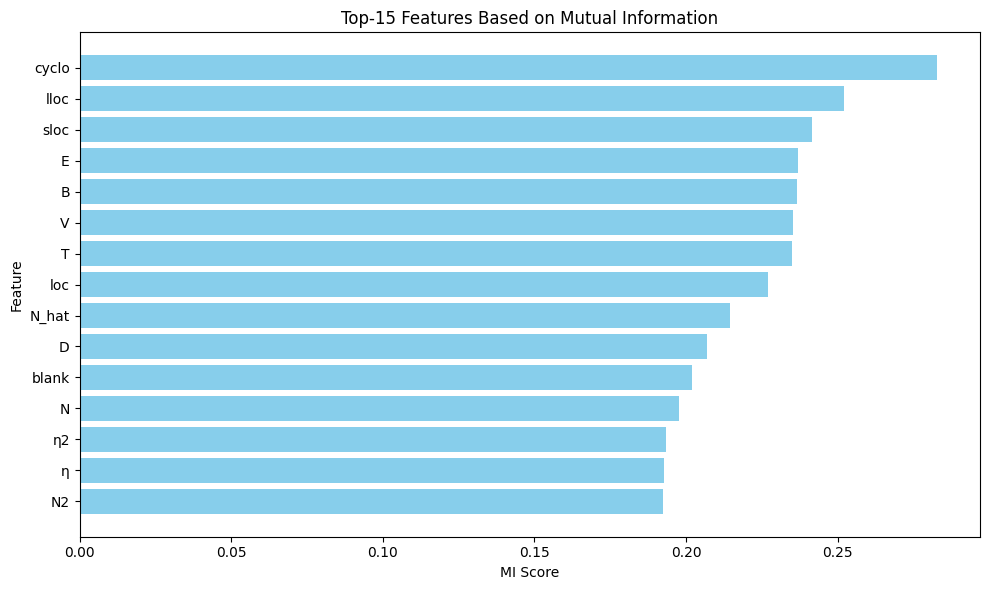

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
import numpy as np

def select_topk_features_MI(X, y, k):
    """
    Feature selection menggunakan Mutual Information.
    Mengambil k fitur teratas berdasarkan skor MI.
    """
    scores = mutual_info_classif(X, y, random_state=42)
    mi_series = pd.Series(scores, index=X.columns)
    selected = mi_series.nlargest(k).index.tolist()
    return selected, scores

selected_features, scores = select_topk_features_MI(X_train, y_train, k=15)

mi_df = pd.DataFrame({
    "feature": X_train.columns,
    "mi_score": scores
}).sort_values("mi_score", ascending=True)

mi_selected_df = mi_df[mi_df["feature"].isin(selected_features)]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(mi_selected_df["feature"], mi_selected_df["mi_score"], color='skyblue')
plt.title("Top-15 Features Based on Mutual Information")
plt.xlabel("MI Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# **MODELING MACHINE LEARNING**

# **RANDOM FOREST**

In [ ]:
import time
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, matthews_corrcoef, confusion_matrix
import numpy as np

n_estimators_list = [100, 200, 300]

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

mean_acc_results = []
mean_mcc_results = []

for n in n_estimators_list:

    print("\n\n======================")
    print(f"   n_estimators = {n}")
    print("======================")

    acc_all = []
    mcc_all = []
    train_time_all = []
    predict_time_all = []
    fold_counter = 1

    # Cross validation of each each n_estimators
    for train_idx, test_idx in rskf.split(X_train, y_train):

        X_train_fold = X_train.iloc[train_idx].copy()
        X_test_fold  = X_train.iloc[test_idx].copy()
        y_train_fold = y_train.iloc[train_idx]
        y_test_fold  = y_train.iloc[test_idx]

        selected_features, scores = select_topk_features_MI(X_train_fold, y_train_fold, k=15)
        X_train_fs = X_train_fold[selected_features]
        X_test_fs  = X_test_fold[selected_features]

        scaler = ModifiedZScoreScaler()
        X_train_scaled = scaler.fit_transform(X_train_fs)
        X_test_scaled  = scaler.transform(X_test_fs)

        # Random Forest
        model = RandomForestClassifier(
            n_estimators=n,
            max_depth=2,
            class_weight='balanced',
            random_state=42,
            n_jobs=-1
        )

        # Timing Training
        start_train = time.time()
        model.fit(X_train_scaled, y_train_fold)
        train_time = time.time() - start_train

        # Timing Prediction
        start_pred = time.time()
        y_pred = model.predict(X_test_scaled)
        pred_time = time.time() - start_pred

        # Evaluation
        acc = accuracy_score(y_test_fold, y_pred)
        mcc = matthews_corrcoef(y_test_fold, y_pred)

        acc_all.append(acc)
        mcc_all.append(mcc)
        train_time_all.append(train_time)
        predict_time_all.append(pred_time)

        print(f"\n===== Fold {fold_counter} ====")
        print("Selected features:", list(selected_features))
        print(f"Accuracy: {acc:.5f}")
        print(f"MCC: {mcc:.5f}")
        print(f"Training Time:  {train_time:.5f} sec")
        print(f"Prediksi Time:  {pred_time:.5f} sec")
        fold_counter += 1

    mean_acc_results.append(np.mean(acc_all))
    mean_mcc_results.append(np.mean(mcc_all))
    mean_train = np.mean(train_time_all)
    mean_pred = np.mean(predict_time_all)

    print("\n>>> RESULT for n_estimators =", n)
    print(f"Mean Accuracy: {np.mean(acc_all):.5f}")
    print(f"Mean MCC: {np.mean(mcc_all):.5f}")
    print(f"Mean Train Time:    {mean_train:.5f} sec")
    print(f"Mean Predict Time:  {mean_pred:.5f} sec")



   n_estimators = 100

===== Fold 1 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'loc', 'B', 'V', 'T', 'E', 'N_hat', 'blank', 'N', 'D', 'η', 'η2', 'N2']
Accuracy: 0.84187
MCC: 0.57818
Training Time:  1.01967 sec
Prediksi Time:  0.06798 sec

===== Fold 2 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'loc', 'V', 'E', 'T', 'B', 'N_hat', 'blank', 'N', 'D', 'N2', 'η', 'η2']
Accuracy: 0.82817
MCC: 0.57821
Training Time:  1.09020 sec
Prediksi Time:  0.04833 sec

===== Fold 3 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'E', 'T', 'loc', 'N_hat', 'blank', 'D', 'η', 'N', 'η2', 'N2']
Accuracy: 0.85201
MCC: 0.61168
Training Time:  0.85041 sec
Prediksi Time:  0.05486 sec

===== Fold 4 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'V', 'B', 'E', 'T', 'loc', 'N_hat', 'blank', 'D', 'N', 'η', 'η2', 'cbo']
Accuracy: 0.84736
MCC: 0.60175
Training Time:  0.60018 sec
Prediksi Time:  0.04568 sec

===== Fold 5 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'loc', 'E

**Visualitation of Evaluation Result of Each n_estimator**

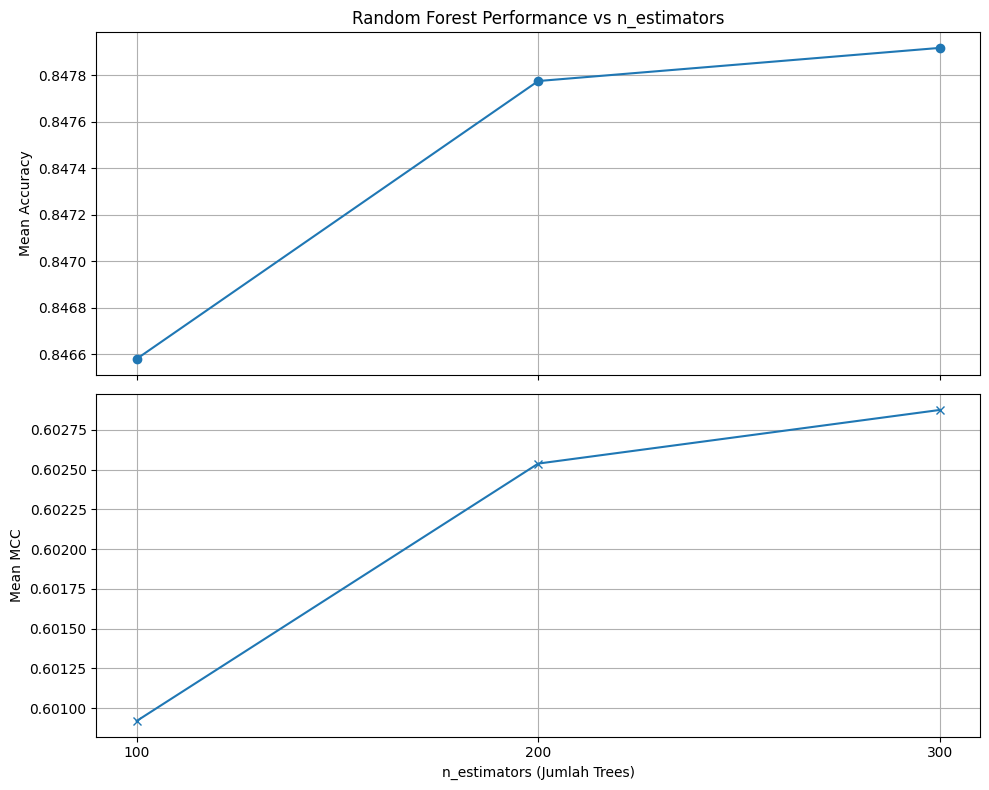

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Accuracy
axes[0].plot(n_estimators_list, mean_acc_results, marker='o')
axes[0].set_ylabel('Mean Accuracy')
axes[0].set_title('Random Forest Performance vs n_estimators')
axes[0].grid(True)

#  MCC
axes[1].plot(n_estimators_list, mean_mcc_results, marker='x')
axes[1].set_xlabel('n_estimators (Jumlah Trees)')
axes[1].set_ylabel('Mean MCC')
axes[1].grid(True)

plt.xticks(n_estimators_list)
plt.tight_layout()
plt.show()

# **KNN**

In [ ]:
import time
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, matthews_corrcoef
import numpy as np

n_neighbors_list = [1, 3, 5, 7, 9, 11]

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

mean_acc_knn = []
mean_mcc_knn = []
mean_train_knn = []
mean_pred_knn = []

for k in n_neighbors_list:

    print("\n\n======================")
    print(f"        K = {k}")
    print("======================")

    acc_all = []
    mcc_all = []
    train_time_all = []
    predict_time_all = []

    fold_counter = 1

    for train_idx, test_idx in rskf.split(X_train, y_train):

        X_train_fold = X_train.iloc[train_idx].copy()
        X_test_fold  = X_train.iloc[test_idx].copy()
        y_train_fold = y_train.iloc[train_idx]
        y_test_fold  = y_train.iloc[test_idx]

        selected_features, scores = select_topk_features_MI(X_train_fold, y_train_fold, k=15)
        X_train_fs = X_train_fold[selected_features]
        X_test_fs  = X_test_fold[selected_features]

        scaler = ModifiedZScoreScaler()
        X_train_scaled = scaler.fit_transform(X_train_fs)
        X_test_scaled  = scaler.transform(X_test_fs)

        model = KNeighborsClassifier(
            n_neighbors=k,
            weights='distance',
            p=2
        )

        # Training time
        start_train = time.time()
        model.fit(X_train_scaled, y_train_fold)
        train_time = time.time() - start_train

        # Prediction time
        start_pred = time.time()
        y_pred = model.predict(X_test_scaled)
        pred_time = time.time() - start_pred

        acc = accuracy_score(y_test_fold, y_pred)
        mcc = matthews_corrcoef(y_test_fold, y_pred)

        acc_all.append(acc)
        mcc_all.append(mcc)
        train_time_all.append(train_time)
        predict_time_all.append(pred_time)

        print(f"\n===== Fold {fold_counter} =====")
        print("Selected features:", list(selected_features))
        print(f"Accuracy: {acc:.5f}")
        print(f"MCC: {mcc:.5f}")
        print(f"Training Time:  {train_time:.5f} sec")
        print(f"Prediction Time: {pred_time:.5f} sec")
        fold_counter += 1

    mean_acc_knn.append(np.mean(acc_all))
    mean_mcc_knn.append(np.mean(mcc_all))
    mean_train_knn.append(np.mean(train_time_all))
    mean_pred_knn.append(np.mean(predict_time_all))

    print("\n>>> RESULT for K =", k)
    print(f"Mean Accuracy: {np.mean(acc_all):.5f}")
    print(f"Mean MCC: {np.mean(mcc_all):.5f}")
    print(f"Mean Train Time:    {np.mean(train_time_all):.5f} sec")
    print(f"Mean Predict Time:  {np.mean(predict_time_all):.5f} sec")



        K = 1

===== Fold 1 =====
Selected features: ['cyclo', 'lloc', 'sloc', 'loc', 'B', 'V', 'T', 'E', 'N_hat', 'blank', 'N', 'D', 'η', 'η2', 'N2']
Accuracy: 0.95149
MCC: 0.82304
Training Time:  0.05018 sec
Prediction Time: 0.12789 sec

===== Fold 2 =====
Selected features: ['cyclo', 'lloc', 'sloc', 'loc', 'V', 'E', 'T', 'B', 'N_hat', 'blank', 'N', 'D', 'N2', 'η', 'η2']
Accuracy: 0.95944
MCC: 0.85149
Training Time:  0.05235 sec
Prediction Time: 0.13654 sec

===== Fold 3 =====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'E', 'T', 'loc', 'N_hat', 'blank', 'D', 'η', 'N', 'η2', 'N2']
Accuracy: 0.95506
MCC: 0.83122
Training Time:  0.04880 sec
Prediction Time: 0.12379 sec

===== Fold 4 =====
Selected features: ['cyclo', 'lloc', 'sloc', 'V', 'B', 'E', 'T', 'loc', 'N_hat', 'blank', 'D', 'N', 'η', 'η2', 'cbo']
Accuracy: 0.94958
MCC: 0.81175
Training Time:  0.11562 sec
Prediction Time: 0.15506 sec

===== Fold 5 =====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'loc', '

**Visualitation of Evaluation Result of n_neighbors**

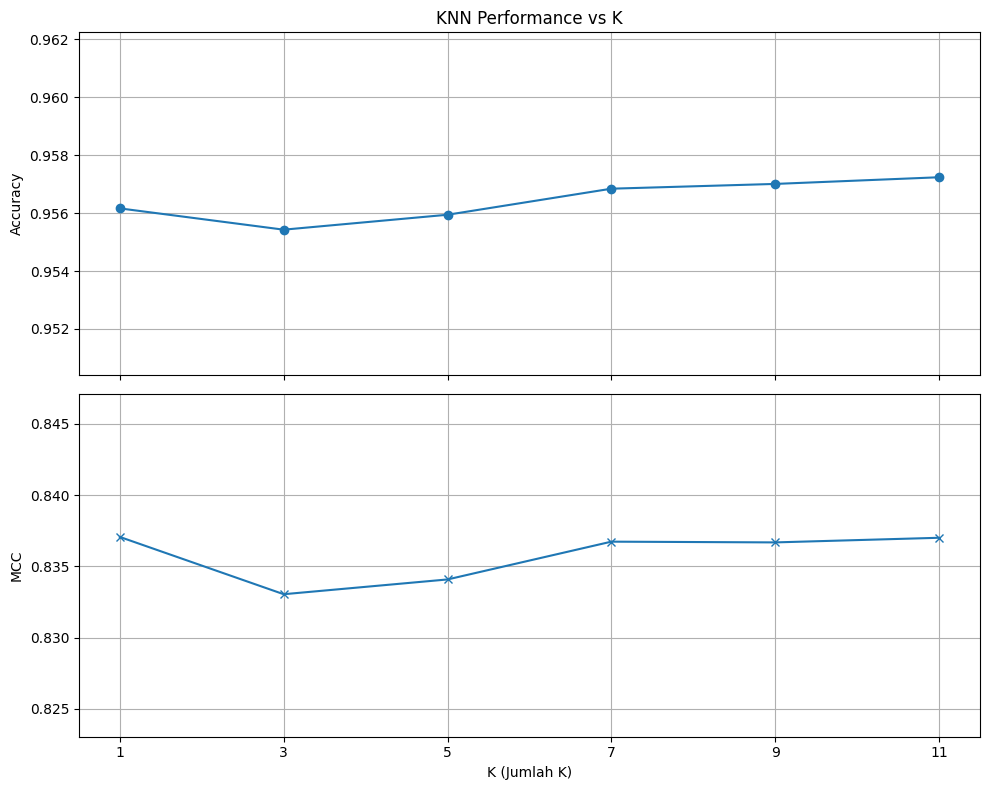

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Accuracy
axes[0].plot(n_neighbors_list, mean_acc_knn, marker='o')
axes[0].set_ylabel("Accuracy")
axes[0].set_title("KNN Performance vs K")
axes[0].grid(True)
axes[0].set_ylim(min(mean_acc_knn)-0.005, max(mean_acc_knn)+0.005)

#  MCC
axes[1].plot(n_neighbors_list, mean_mcc_knn, marker='x')
axes[1].set_xlabel("K (Jumlah K)")
axes[1].set_ylabel("MCC")
axes[1].grid(True)
axes[1].set_ylim(min(mean_mcc_knn)-0.01, max(mean_mcc_knn)+0.01)

# Set X-ticks agar sesuai angka K
plt.xticks(n_neighbors_list)

plt.tight_layout()
plt.show()

# **LOGISTIC REGRESION**

In [ ]:
import time
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, matthews_corrcoef

C_list = [0.001, 0.01, 0.1, 1, 10, 100]

mean_acc_lr = []
mean_mcc_lr = []

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

print("\n===============================")
print("  LOGISTIC REGRESSION EVALUATION")
print("===============================\n")

for C in C_list:

    print("\n\n=====================")
    print(f"        C = {C}")
    print("=====================")

    acc_all = []
    mcc_all = []
    train_time_all = []
    predict_time_all = []
    fold_counter = 1

    for train_idx, test_idx in rskf.split(X_train, y_train):

        X_train_fold = X_train.iloc[train_idx].copy()
        X_test_fold  = X_train.iloc[test_idx].copy()
        y_train_fold = y_train.iloc[train_idx]
        y_test_fold  = y_train.iloc[test_idx]

        selected_features, scores = select_topk_features_MI(X_train_fold, y_train_fold, k=15)
        X_train_fs = X_train_fold[selected_features]
        X_test_fs  = X_test_fold[selected_features]

        scaler = ModifiedZScoreScaler()
        X_train_scaled = scaler.fit_transform(X_train_fs)
        X_test_scaled  = scaler.transform(X_test_fs)

        model = LogisticRegression(C=C, max_iter=3000, solver='lbfgs')

        start_train = time.time()
        model.fit(X_train_scaled, y_train_fold)
        train_time = time.time() - start_train

        start_pred = time.time()
        y_pred = model.predict(X_test_scaled)
        pred_time = time.time() - start_pred

        acc = accuracy_score(y_test_fold, y_pred)
        mcc = matthews_corrcoef(y_test_fold, y_pred)

        acc_all.append(acc)
        mcc_all.append(mcc)
        train_time_all.append(train_time)
        predict_time_all.append(pred_time)

        print(f"\n===== Fold {fold_counter} ====")
        print("Selected features:", list(selected_features))
        print(f"Accuracy: {acc:.5f}")
        print(f"MCC: {mcc:.5f}")
        print(f"Training Time:  {train_time:.5f} sec")
        print(f"Prediction Time:{pred_time:.5f} sec")

        fold_counter += 1

    mean_acc_lr.append(np.mean(acc_all))
    mean_mcc_lr.append(np.mean(mcc_all))

    print("\n>>> RESULT for C =", C)
    print(f"Mean Accuracy: {np.mean(acc_all):.5f}")
    print(f"Mean MCC: {np.mean(mcc_all):.5f}")
    print(f"Mean Train Time:    {np.mean(train_time_all):.5f} sec")
    print(f"Mean Predict Time:  {np.mean(predict_time_all):.5f} sec")


  LOGISTIC REGRESSION EVALUATION



        C = 0.001

===== Fold 1 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'loc', 'B', 'V', 'T', 'E', 'N_hat', 'blank', 'N', 'D', 'η', 'η2', 'N2']
Accuracy: 0.92436
MCC: 0.69855
Training Time:  2.21722 sec
Prediction Time:0.00210 sec

===== Fold 2 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'loc', 'V', 'E', 'T', 'B', 'N_hat', 'blank', 'N', 'D', 'N2', 'η', 'η2']
Accuracy: 0.93395
MCC: 0.74105
Training Time:  4.99371 sec
Prediction Time:0.00400 sec

===== Fold 3 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'E', 'T', 'loc', 'N_hat', 'blank', 'D', 'η', 'N', 'η2', 'N2']
Accuracy: 0.93231
MCC: 0.73199
Training Time:  1.80163 sec
Prediction Time:0.00397 sec

===== Fold 4 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'V', 'B', 'E', 'T', 'loc', 'N_hat', 'blank', 'D', 'N', 'η', 'η2', 'cbo']
Accuracy: 0.45985
MCC: 0.28605
Training Time:  0.08922 sec
Prediction Time:0.00477 sec

===== Fold 5 ====
Selected features: ['cyclo', 'llo

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



===== Fold 17 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'V', 'B', 'E', 'loc', 'T', 'N_hat', 'blank', 'D', 'N', 'η', 'η2', 'N2']
Accuracy: 0.93258
MCC: 0.73333
Training Time:  7.06221 sec
Prediction Time:0.00183 sec

===== Fold 18 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'loc', 'E', 'T', 'N_hat', 'blank', 'D', 'N', 'η2', 'η', 'cbo']
Accuracy: 0.45793
MCC: 0.28474
Training Time:  0.02373 sec
Prediction Time:0.00188 sec

===== Fold 19 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'V', 'loc', 'E', 'B', 'T', 'N_hat', 'blank', 'D', 'N', 'η2', 'η', 'cbo']
Accuracy: 0.45026
MCC: 0.27951
Training Time:  0.02407 sec
Prediction Time:0.00182 sec

===== Fold 20 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'V', 'B', 'E', 'T', 'loc', 'N_hat', 'blank', 'D', 'N', 'η', 'cbo', 'η2']
Accuracy: 0.93065
MCC: 0.73069
Training Time:  6.77241 sec
Prediction Time:0.00194 sec

===== Fold 21 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'E', 'T', 'loc', 'N_hat', 

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



===== Fold 23 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'loc', 'T', 'E', 'N_hat', 'blank', 'D', 'N', 'cbo', 'η2', 'η']
Accuracy: 0.92601
MCC: 0.70819
Training Time:  12.55459 sec
Prediction Time:0.00394 sec

===== Fold 24 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'E', 'V', 'T', 'loc', 'N_hat', 'blank', 'D', 'η', 'N', 'N2', 'cbo']
Accuracy: 0.45410
MCC: 0.28212
Training Time:  0.07322 sec
Prediction Time:0.00427 sec

===== Fold 25 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'V', 'B', 'T', 'E', 'loc', 'N_hat', 'blank', 'D', 'N', 'η', 'η2', 'N2']
Accuracy: 0.93257
MCC: 0.73640
Training Time:  2.13859 sec
Prediction Time:0.00232 sec

>>> RESULT for C = 1
Mean Accuracy: 0.76014
Mean MCC: 0.56782
Mean Train Time:    3.06879 sec
Mean Predict Time:  0.00218 sec


        C = 10

===== Fold 1 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'loc', 'B', 'V', 'T', 'E', 'N_hat', 'blank', 'N', 'D', 'η', 'η2', 'N2']
Accuracy: 0.92327
MCC: 0.69731
Training Time:

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



===== Fold 23 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'loc', 'T', 'E', 'N_hat', 'blank', 'D', 'N', 'cbo', 'η2', 'η']
Accuracy: 0.92628
MCC: 0.70919
Training Time:  4.95229 sec
Prediction Time:0.00206 sec

===== Fold 24 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'E', 'V', 'T', 'loc', 'N_hat', 'blank', 'D', 'η', 'N', 'N2', 'cbo']
Accuracy: 0.45410
MCC: 0.28212
Training Time:  0.02428 sec
Prediction Time:0.00188 sec

===== Fold 25 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'V', 'B', 'T', 'E', 'loc', 'N_hat', 'blank', 'D', 'N', 'η', 'η2', 'N2']
Accuracy: 0.93257
MCC: 0.73640
Training Time:  3.86639 sec
Prediction Time:0.00182 sec

>>> RESULT for C = 10
Mean Accuracy: 0.76018
Mean MCC: 0.56799
Mean Train Time:    2.89792 sec
Mean Predict Time:  0.00207 sec


        C = 100

===== Fold 1 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'loc', 'B', 'V', 'T', 'E', 'N_hat', 'blank', 'N', 'D', 'η', 'η2', 'N2']
Accuracy: 0.92327
MCC: 0.69731
Training Time

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



===== Fold 23 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'loc', 'T', 'E', 'N_hat', 'blank', 'D', 'N', 'cbo', 'η2', 'η']
Accuracy: 0.92628
MCC: 0.70919
Training Time:  4.96914 sec
Prediction Time:0.00218 sec

===== Fold 24 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'E', 'V', 'T', 'loc', 'N_hat', 'blank', 'D', 'η', 'N', 'N2', 'cbo']
Accuracy: 0.45410
MCC: 0.28212
Training Time:  0.06198 sec
Prediction Time:0.00398 sec

===== Fold 25 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'V', 'B', 'T', 'E', 'loc', 'N_hat', 'blank', 'D', 'N', 'η', 'η2', 'N2']
Accuracy: 0.93257
MCC: 0.73640
Training Time:  2.56452 sec
Prediction Time:0.00186 sec

>>> RESULT for C = 100
Mean Accuracy: 0.76015
Mean MCC: 0.56786
Mean Train Time:    2.44442 sec
Mean Predict Time:  0.00217 sec


**Visualitation of Evaluation Result of C**

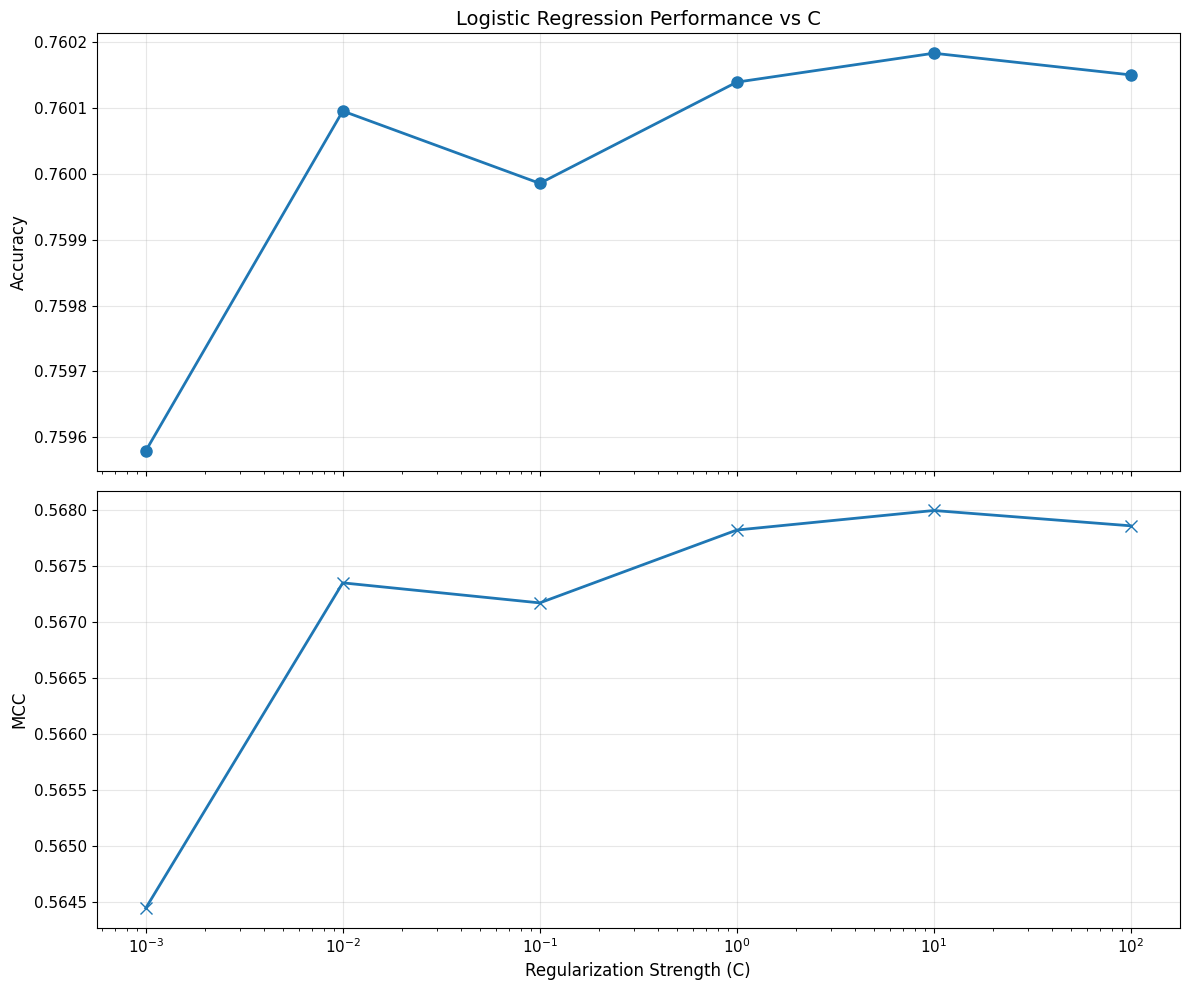

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Accuracy
axes[0].plot(C_list, mean_acc_lr, marker='o', linewidth=2, markersize=8)
axes[0].set_xscale('log')
axes[0].set_ylabel("Accuracy", fontsize=12)
axes[0].set_title("Logistic Regression Performance vs C", fontsize=14)
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='both', labelsize=11)

# MCC
axes[1].plot(C_list, mean_mcc_lr, marker='x', linewidth=2, markersize=8)
axes[1].set_xscale('log')
axes[1].set_xlabel("Regularization Strength (C)", fontsize=12)
axes[1].set_ylabel("MCC", fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='both', labelsize=11)

plt.xticks(C_list)

plt.tight_layout()
plt.show()

# **MLP**

In [ ]:
import time
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, matthews_corrcoef, confusion_matrix
import numpy as np

# hidden layer
hidden_layer_sizes_list = [4, 8, 16, 32, 64, 100]

mean_acc_mlp = []
mean_mcc_mlp = []
train_time_all = []
predict_time_all = []
fold_counter = 1

# Repeated Cross Validation 5 times and 5 splitting
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

print("\n===============================")
print("      MLP CLASSIFIER EVALUATION")
print("===============================\n")

for h in hidden_layer_sizes_list:

    print("\n\n======================")
    print(f"  Hidden Layer = {h}")
    print("======================")

    acc_all = []
    mcc_all = []
    train_time_all = []
    predict_time_all = []

    fold_counter = 1

    # Cross Validation
    for train_idx, test_idx in rskf.split(X_train, y_train):

        X_train_fold = X_train.iloc[train_idx].copy()
        X_test_fold  = X_train.iloc[test_idx].copy()
        y_train_fold = y_train.iloc[train_idx]
        y_test_fold  = y_train.iloc[test_idx]

        selected_features, scores = select_topk_features_MI(X_train_fold, y_train_fold, k=15)
        X_train_fs = X_train_fold[selected_features]
        X_test_fs  = X_test_fold[selected_features]

        scaler = ModifiedZScoreScaler()
        X_train_scaled = scaler.fit_transform(X_train_fs)
        X_test_scaled  = scaler.transform(X_test_fs)

        # MLP Classifier Model
        model = MLPClassifier(
            hidden_layer_sizes=(h),
            activation='relu',
            solver='adam',
            max_iter=2000,
            random_state=42
        )

        # Train Time
        start_train = time.time()
        model.fit(X_train_scaled, y_train_fold)
        train_time = time.time() - start_train

        # Predic Time
        start_pred = time.time()
        y_pred = model.predict(X_test_scaled)
        pred_time = time.time() - start_pred

        model.fit(X_train_scaled, y_train_fold)
        y_pred = model.predict(X_test_scaled)

        # Evaluation
        acc = accuracy_score(y_test_fold, y_pred)
        mcc = matthews_corrcoef(y_test_fold, y_pred)

        acc_all.append(acc)
        mcc_all.append(mcc)
        train_time_all.append(train_time)
        predict_time_all.append(pred_time)

        print(f"\n===== Fold {fold_counter} ====")
        print("Selected features:", list(selected_features))
        print(f"Accuracy: {acc:.5f}")
        print(f"MCC: {mcc:.5f}")
        print(f"Training Time:  {train_time:.5f} sec")
        print(f"Prediksi Time:  {pred_time:.5f} sec")
        fold_counter += 1

    mean_acc_mlp.append(np.mean(acc_all))
    mean_mcc_mlp.append(np.mean(mcc_all))
    mean_train = np.mean(train_time_all)
    mean_pred = np.mean(predict_time_all)

    print("\n>>> RESULT for Hidden Layer =", hidden_layer_sizes_list)
    print(f"Mean Accuracy: {np.mean(acc_all):.5f}")
    print(f"Mean MCC: {np.mean(mcc_all):.5f}")
    print(f"Mean Train Time:    {mean_train:.5f} sec")
    print(f"Mean Predict Time:  {mean_pred:.5f} sec")


      MLP CLASSIFIER EVALUATION



  Hidden Layer = 4

===== Fold 1 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'loc', 'B', 'V', 'T', 'E', 'N_hat', 'blank', 'N', 'D', 'η', 'η2', 'N2']
Accuracy: 0.92464
MCC: 0.69891
Training Time:  3.67793 sec
Prediksi Time:  0.00235 sec

===== Fold 2 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'loc', 'V', 'E', 'T', 'B', 'N_hat', 'blank', 'N', 'D', 'N2', 'η', 'η2']
Accuracy: 0.93231
MCC: 0.73605
Training Time:  3.79263 sec
Prediksi Time:  0.00167 sec

===== Fold 3 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'E', 'T', 'loc', 'N_hat', 'blank', 'D', 'η', 'N', 'η2', 'N2']
Accuracy: 0.92546
MCC: 0.70739
Training Time:  3.28180 sec
Prediksi Time:  0.00254 sec

===== Fold 4 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'V', 'B', 'E', 'T', 'loc', 'N_hat', 'blank', 'D', 'N', 'η', 'η2', 'cbo']
Accuracy: 0.83886
MCC: 0.00000
Training Time:  6.12077 sec
Prediksi Time:  0.00269 sec

===== Fold 5 ====
Selected features: ['cyclo', 'llo

**Visualitation of Evaluation Result of hidden_layer**

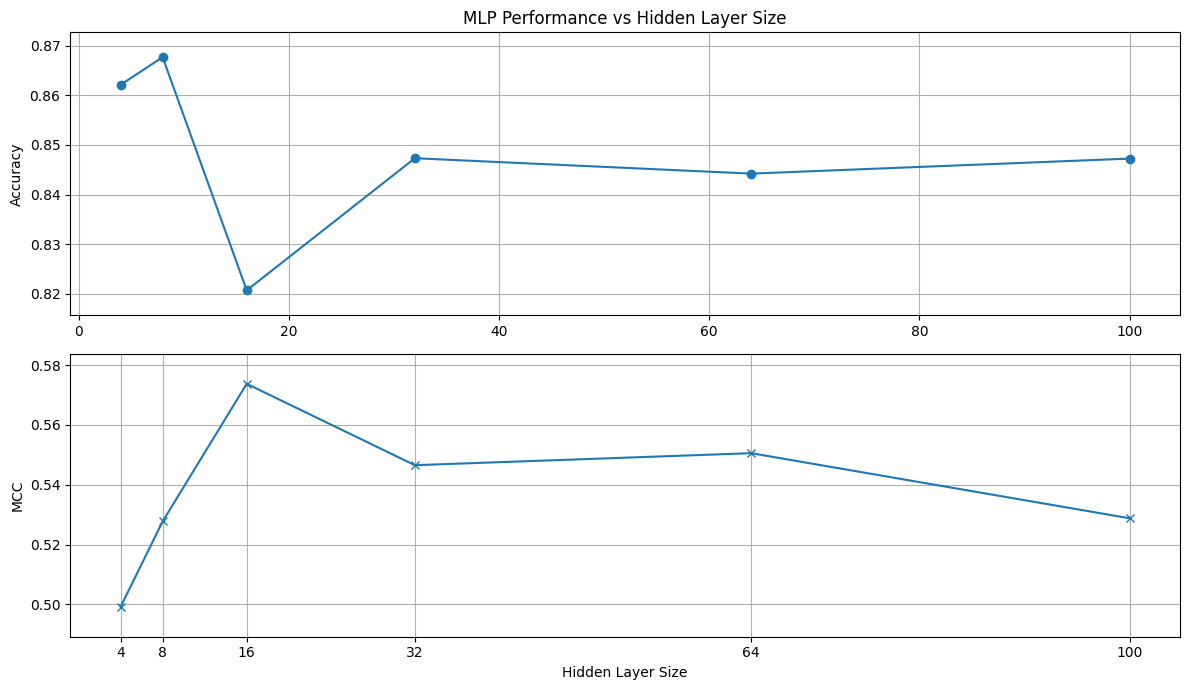

In [ ]:
plt.figure(figsize=(12, 7))

# Accuracy
plt.subplot(2, 1, 1)
plt.plot(hidden_layer_sizes_list, mean_acc_mlp, marker='o')
plt.title("MLP Performance vs Hidden Layer Size")
plt.ylabel("Accuracy")
plt.grid(True)
plt.ylim(min(mean_acc_mlp) - 0.005, max(mean_acc_mlp) + 0.005)

# MCC
plt.subplot(2, 1, 2)
plt.plot(hidden_layer_sizes_list, mean_mcc_mlp, marker='x')
plt.xlabel("Hidden Layer Size")
plt.ylabel("MCC")
plt.grid(True)
plt.ylim(min(mean_mcc_mlp) - 0.01, max(mean_mcc_mlp) + 0.01)

# Set X-ticks agar sesuai angka
plt.xticks(hidden_layer_sizes_list)

plt.tight_layout()
plt.show()

# **TABNET**

In [ ]:
!pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.8 MB/s eta 0:00:00


In [ ]:
import time
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, matthews_corrcoef
import numpy as np
import torch
import pandas as pd

# attention and decision
n_d_a_list = [8, 16, 32, 64]

mean_acc_tabnet = []
mean_mcc_tabnet = []

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

print("\n===============================")
print("         TABNET EVALUATION")
print("===============================\n")

for dim in n_d_a_list:

    print(f"\n\n======================\n  n_d = n_a = {dim}\n======================")

    acc_all = []
    mcc_all = []
    train_time_all_fold = []
    predict_time_all_fold = []
    fold_counter = 1

    for train_idx, test_idx in rskf.split(X_train, y_train):

        X_train_fold = X_train.iloc[train_idx].copy()
        X_test_fold  = X_train.iloc[test_idx].copy()
        y_train_fold = y_train.iloc[train_idx].values
        y_test_fold  = y_train.iloc[test_idx].values

        selected_features, scores = select_topk_features_MI(X_train_fold, y_train_fold, k=15)

        X_train_fs = X_train_fold[selected_features]
        X_test_fs  = X_test_fold[selected_features]

        scaler = ModifiedZScoreScaler()
        X_train_scaled = scaler.fit_transform(X_train_fs)
        X_test_scaled  = scaler.transform(X_test_fs)

        X_train_scaled_tabnet = X_train_scaled.values if isinstance(X_train_scaled, pd.DataFrame) else X_train_scaled
        X_test_scaled_tabnet = X_test_scaled.values if isinstance(X_test_scaled, pd.DataFrame) else X_test_scaled

        # TabNet Modeling
        model = TabNetClassifier(
            n_d=dim,
            n_a=dim,
            n_steps=5,
            gamma=1.3,
            lambda_sparse=1e-4,
            optimizer_fn=torch.optim.Adam,
            optimizer_params=dict(lr=1e-3),
            verbose=0,
            seed=42
        )

        # Train Time
        start_train = time.time()
        model.fit(
            X_train_scaled_tabnet, y_train_fold,
            eval_set=[(X_test_scaled_tabnet, y_test_fold)],
            eval_metric=['accuracy'],
            max_epochs=100,
            patience=30
        )
        train_time = time.time() - start_train

        # Predic Time
        start_pred = time.time()
        y_pred = model.predict(X_test_scaled_tabnet)
        pred_time = time.time() - start_pred

        # Evaluation
        acc = accuracy_score(y_test_fold, y_pred)
        mcc = matthews_corrcoef(y_test_fold, y_pred)

        acc_all.append(acc)
        mcc_all.append(mcc)
        train_time_all_fold.append(train_time)
        predict_time_all_fold.append(pred_time)

        print(f"\n===== Fold {fold_counter} ====")
        print("Selected features:", list(selected_features))
        print(f"Accuracy: {acc:.5f}")
        print(f"MCC: {mcc:.5f}")
        print(f"Training Time:  {train_time:.5f} sec")
        print(f"Prediksi Time:  {pred_time:.5f} sec")
        fold_counter += 1

    mean_acc_tabnet.append(np.mean(acc_all))
    mean_mcc_tabnet.append(np.mean(mcc_all))
    mean_train = np.mean(train_time_all_fold)
    mean_pred = np.mean(predict_time_all_fold)

    print(f"\n>>> RESULT for n_d = n_a = {dim}")
    print(f"Mean Accuracy: {np.mean(acc_all):.5f}")
    print(f"Mean MCC: {np.mean(mcc_all):.5f}")
    print(f"Mean Train Time:    {mean_train:.5f} sec")
    print(f"Mean Predict Time:  {mean_pred:.5f} sec")


         TABNET EVALUATION



  n_d = n_a = 8

Early stopping occurred at epoch 46 with best_epoch = 16 and best_val_0_accuracy = 0.89422


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 1 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'loc', 'B', 'V', 'T', 'E', 'N_hat', 'blank', 'N', 'D', 'η', 'η2', 'N2']
Accuracy: 0.89422
MCC: 0.55147
Training Time:  59.78384 sec
Prediksi Time:  0.10163 sec

Early stopping occurred at epoch 43 with best_epoch = 13 and best_val_0_accuracy = 0.90765


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 2 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'loc', 'V', 'E', 'T', 'B', 'N_hat', 'blank', 'N', 'D', 'N2', 'η', 'η2']
Accuracy: 0.90765
MCC: 0.63418
Training Time:  51.03674 sec
Prediksi Time:  0.10845 sec

Early stopping occurred at epoch 39 with best_epoch = 9 and best_val_0_accuracy = 0.89586


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 3 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'E', 'T', 'loc', 'N_hat', 'blank', 'D', 'η', 'N', 'η2', 'N2']
Accuracy: 0.89586
MCC: 0.59269
Training Time:  43.76217 sec
Prediksi Time:  0.10712 sec

Early stopping occurred at epoch 44 with best_epoch = 14 and best_val_0_accuracy = 0.91779


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 4 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'V', 'B', 'E', 'T', 'loc', 'N_hat', 'blank', 'D', 'N', 'η', 'η2', 'cbo']
Accuracy: 0.91779
MCC: 0.66519
Training Time:  51.72717 sec
Prediksi Time:  0.17532 sec

Early stopping occurred at epoch 45 with best_epoch = 15 and best_val_0_accuracy = 0.90844


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 5 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'loc', 'E', 'T', 'N_hat', 'D', 'blank', 'N', 'η', 'η2', 'N2']
Accuracy: 0.90844
MCC: 0.63292
Training Time:  52.22320 sec
Prediksi Time:  0.11322 sec

Early stopping occurred at epoch 42 with best_epoch = 12 and best_val_0_accuracy = 0.90326


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 6 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'V', 'B', 'loc', 'T', 'E', 'N_hat', 'blank', 'D', 'N', 'η2', 'cbo', 'N2']
Accuracy: 0.90326
MCC: 0.61042
Training Time:  50.07797 sec
Prediksi Time:  0.11762 sec

Early stopping occurred at epoch 41 with best_epoch = 11 and best_val_0_accuracy = 0.91395


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 7 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'T', 'E', 'V', 'B', 'loc', 'N_hat', 'blank', 'N', 'D', 'cbo', 'η', 'N2']
Accuracy: 0.91395
MCC: 0.65007
Training Time:  48.15549 sec
Prediksi Time:  0.10298 sec

Early stopping occurred at epoch 43 with best_epoch = 13 and best_val_0_accuracy = 0.90847


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 8 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'V', 'B', 'loc', 'E', 'T', 'N_hat', 'blank', 'D', 'N', 'η', 'η2', 'cbo']
Accuracy: 0.90847
MCC: 0.63628
Training Time:  49.80140 sec
Prediksi Time:  0.10575 sec

Early stopping occurred at epoch 39 with best_epoch = 9 and best_val_0_accuracy = 0.91367


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 9 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'loc', 'T', 'E', 'N_hat', 'blank', 'N', 'D', 'η', 'rfc', 'N2']
Accuracy: 0.91367
MCC: 0.67045
Training Time:  44.59521 sec
Prediksi Time:  0.10651 sec

Early stopping occurred at epoch 38 with best_epoch = 8 and best_val_0_accuracy = 0.90789


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 10 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'T', 'E', 'loc', 'N_hat', 'D', 'blank', 'N', 'η2', 'η', 'N2']
Accuracy: 0.90789
MCC: 0.64562
Training Time:  42.50460 sec
Prediksi Time:  0.11018 sec

Early stopping occurred at epoch 40 with best_epoch = 10 and best_val_0_accuracy = 0.91477


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 11 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'V', 'B', 'E', 'T', 'loc', 'N_hat', 'blank', 'D', 'N2', 'cbo', 'N', 'η2']
Accuracy: 0.91477
MCC: 0.66211
Training Time:  45.81368 sec
Prediksi Time:  0.10332 sec

Early stopping occurred at epoch 42 with best_epoch = 12 and best_val_0_accuracy = 0.90025


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 12 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'T', 'E', 'V', 'loc', 'N_hat', 'blank', 'D', 'N', 'N2', 'η', 'η2']
Accuracy: 0.90025
MCC: 0.59470
Training Time:  47.87047 sec
Prediksi Time:  0.10340 sec

Early stopping occurred at epoch 46 with best_epoch = 16 and best_val_0_accuracy = 0.90244


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 13 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'loc', 'V', 'B', 'E', 'T', 'N_hat', 'blank', 'N', 'D', 'η2', 'N2', 'η']
Accuracy: 0.90244
MCC: 0.60538
Training Time:  59.88452 sec
Prediksi Time:  0.28636 sec

Early stopping occurred at epoch 44 with best_epoch = 14 and best_val_0_accuracy = 0.90271


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 14 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'E', 'T', 'loc', 'N_hat', 'blank', 'D', 'N', 'η', 'N2', 'η2']
Accuracy: 0.90271
MCC: 0.59519
Training Time:  51.19983 sec
Prediksi Time:  0.12306 sec

Early stopping occurred at epoch 41 with best_epoch = 11 and best_val_0_accuracy = 0.90625


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 15 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'loc', 'E', 'T', 'N_hat', 'blank', 'η2', 'D', 'N', 'η', 'N2']
Accuracy: 0.90625
MCC: 0.62697
Training Time:  47.35003 sec
Prediksi Time:  0.10076 sec

Early stopping occurred at epoch 43 with best_epoch = 13 and best_val_0_accuracy = 0.90326


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 16 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'E', 'T', 'loc', 'N_hat', 'blank', 'D', 'N', 'η', 'N2', 'η2']
Accuracy: 0.90326
MCC: 0.60448
Training Time:  49.93666 sec
Prediksi Time:  0.14864 sec

Early stopping occurred at epoch 40 with best_epoch = 10 and best_val_0_accuracy = 0.90162


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 17 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'V', 'B', 'E', 'loc', 'T', 'N_hat', 'blank', 'D', 'N', 'η', 'η2', 'N2']
Accuracy: 0.90162
MCC: 0.61100
Training Time:  46.01787 sec
Prediksi Time:  0.10304 sec

Early stopping occurred at epoch 41 with best_epoch = 11 and best_val_0_accuracy = 0.91313


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 18 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'loc', 'E', 'T', 'N_hat', 'blank', 'D', 'N', 'η2', 'η', 'cbo']
Accuracy: 0.91313
MCC: 0.65449
Training Time:  49.04206 sec
Prediksi Time:  0.10268 sec

Early stopping occurred at epoch 39 with best_epoch = 9 and best_val_0_accuracy = 0.90573


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 19 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'V', 'loc', 'E', 'B', 'T', 'N_hat', 'blank', 'D', 'N', 'η2', 'η', 'cbo']
Accuracy: 0.90573
MCC: 0.62661
Training Time:  44.90076 sec
Prediksi Time:  0.11052 sec
Stop training because you reached max_epochs = 100 with best_epoch = 80 and best_val_0_accuracy = 0.92215


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 20 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'V', 'B', 'E', 'T', 'loc', 'N_hat', 'blank', 'D', 'N', 'η', 'cbo', 'η2']
Accuracy: 0.92215
MCC: 0.68487
Training Time:  112.90241 sec
Prediksi Time:  0.10241 sec

Early stopping occurred at epoch 39 with best_epoch = 9 and best_val_0_accuracy = 0.89888


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 21 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'E', 'T', 'loc', 'N_hat', 'blank', 'D', 'N', 'η2', 'η', 'N2']
Accuracy: 0.89888
MCC: 0.59615
Training Time:  45.30337 sec
Prediksi Time:  0.11083 sec

Early stopping occurred at epoch 44 with best_epoch = 14 and best_val_0_accuracy = 0.9123


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 22 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'loc', 'V', 'B', 'E', 'T', 'N_hat', 'blank', 'D', 'N', 'cbo', 'η', 'η2']
Accuracy: 0.91230
MCC: 0.64857
Training Time:  50.50324 sec
Prediksi Time:  0.10144 sec

Early stopping occurred at epoch 40 with best_epoch = 10 and best_val_0_accuracy = 0.90326


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 23 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'loc', 'T', 'E', 'N_hat', 'blank', 'D', 'N', 'cbo', 'η2', 'η']
Accuracy: 0.90326
MCC: 0.61449
Training Time:  46.31297 sec
Prediksi Time:  0.10554 sec

Early stopping occurred at epoch 40 with best_epoch = 10 and best_val_0_accuracy = 0.91395


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 24 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'E', 'V', 'T', 'loc', 'N_hat', 'blank', 'D', 'η', 'N', 'N2', 'cbo']
Accuracy: 0.91395
MCC: 0.66250
Training Time:  45.75862 sec
Prediksi Time:  0.11790 sec

Early stopping occurred at epoch 40 with best_epoch = 10 and best_val_0_accuracy = 0.90981


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 25 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'V', 'B', 'T', 'E', 'loc', 'N_hat', 'blank', 'D', 'N', 'η', 'η2', 'N2']
Accuracy: 0.90981
MCC: 0.63939
Training Time:  46.14919 sec
Prediksi Time:  0.10357 sec

>>> RESULT for n_d = n_a = 8
Mean Accuracy: 0.90727
Mean MCC: 0.62865
Mean Train Time:    51.30454 sec
Mean Predict Time:  0.11889 sec


  n_d = n_a = 16
Stop training because you reached max_epochs = 100 with best_epoch = 95 and best_val_0_accuracy = 0.92244


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 1 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'loc', 'B', 'V', 'T', 'E', 'N_hat', 'blank', 'N', 'D', 'η', 'η2', 'N2']
Accuracy: 0.92244
MCC: 0.68729
Training Time:  129.48036 sec
Prediksi Time:  0.12527 sec
Stop training because you reached max_epochs = 100 with best_epoch = 99 and best_val_0_accuracy = 0.92656


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 2 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'loc', 'V', 'E', 'T', 'B', 'N_hat', 'blank', 'N', 'D', 'N2', 'η', 'η2']
Accuracy: 0.92656
MCC: 0.70500
Training Time:  131.81745 sec
Prediksi Time:  0.12669 sec

Early stopping occurred at epoch 96 with best_epoch = 66 and best_val_0_accuracy = 0.9197


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 3 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'E', 'T', 'loc', 'N_hat', 'blank', 'D', 'η', 'N', 'η2', 'N2']
Accuracy: 0.91970
MCC: 0.67552
Training Time:  126.64289 sec
Prediksi Time:  0.12383 sec
Stop training because you reached max_epochs = 100 with best_epoch = 96 and best_val_0_accuracy = 0.9208


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 4 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'V', 'B', 'E', 'T', 'loc', 'N_hat', 'blank', 'D', 'N', 'η', 'η2', 'cbo']
Accuracy: 0.92080
MCC: 0.67946
Training Time:  132.34340 sec
Prediksi Time:  0.12440 sec
Stop training because you reached max_epochs = 100 with best_epoch = 89 and best_val_0_accuracy = 0.92626


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 5 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'loc', 'E', 'T', 'N_hat', 'D', 'blank', 'N', 'η', 'η2', 'N2']
Accuracy: 0.92626
MCC: 0.70362
Training Time:  130.78128 sec
Prediksi Time:  0.19537 sec
Stop training because you reached max_epochs = 100 with best_epoch = 91 and best_val_0_accuracy = 0.92628


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 6 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'V', 'B', 'loc', 'T', 'E', 'N_hat', 'blank', 'D', 'N', 'η2', 'cbo', 'N2']
Accuracy: 0.92628
MCC: 0.70432
Training Time:  131.01888 sec
Prediksi Time:  0.11616 sec
Stop training because you reached max_epochs = 100 with best_epoch = 95 and best_val_0_accuracy = 0.92244


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 7 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'T', 'E', 'V', 'B', 'loc', 'N_hat', 'blank', 'N', 'D', 'cbo', 'η', 'N2']
Accuracy: 0.92244
MCC: 0.68611
Training Time:  132.40740 sec
Prediksi Time:  0.13092 sec
Stop training because you reached max_epochs = 100 with best_epoch = 93 and best_val_0_accuracy = 0.91998


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 8 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'V', 'B', 'loc', 'E', 'T', 'N_hat', 'blank', 'D', 'N', 'η', 'η2', 'cbo']
Accuracy: 0.91998
MCC: 0.67579
Training Time:  133.90597 sec
Prediksi Time:  0.12870 sec
Stop training because you reached max_epochs = 100 with best_epoch = 96 and best_val_0_accuracy = 0.92464


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 9 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'loc', 'T', 'E', 'N_hat', 'blank', 'N', 'D', 'η', 'rfc', 'N2']
Accuracy: 0.92464
MCC: 0.70076
Training Time:  134.66610 sec
Prediksi Time:  0.11506 sec
Stop training because you reached max_epochs = 100 with best_epoch = 91 and best_val_0_accuracy = 0.92297


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 10 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'T', 'E', 'loc', 'N_hat', 'D', 'blank', 'N', 'η2', 'η', 'N2']
Accuracy: 0.92297
MCC: 0.68871
Training Time:  134.63770 sec
Prediksi Time:  0.11698 sec

Early stopping occurred at epoch 68 with best_epoch = 38 and best_val_0_accuracy = 0.91395


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 11 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'V', 'B', 'E', 'T', 'loc', 'N_hat', 'blank', 'D', 'N2', 'cbo', 'N', 'η2']
Accuracy: 0.91395
MCC: 0.64672
Training Time:  89.67999 sec
Prediksi Time:  0.12120 sec
Stop training because you reached max_epochs = 100 with best_epoch = 94 and best_val_0_accuracy = 0.91888


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 12 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'T', 'E', 'V', 'loc', 'N_hat', 'blank', 'D', 'N', 'N2', 'η', 'η2']
Accuracy: 0.91888
MCC: 0.67173
Training Time:  130.91475 sec
Prediksi Time:  0.13227 sec
Stop training because you reached max_epochs = 100 with best_epoch = 99 and best_val_0_accuracy = 0.91724


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 13 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'loc', 'V', 'B', 'E', 'T', 'N_hat', 'blank', 'N', 'D', 'η2', 'N2', 'η']
Accuracy: 0.91724
MCC: 0.66264
Training Time:  129.51566 sec
Prediksi Time:  0.12240 sec
Stop training because you reached max_epochs = 100 with best_epoch = 98 and best_val_0_accuracy = 0.9219


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 14 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'E', 'T', 'loc', 'N_hat', 'blank', 'D', 'N', 'η', 'N2', 'η2']
Accuracy: 0.92190
MCC: 0.68405
Training Time:  131.31635 sec
Prediksi Time:  0.12413 sec

Early stopping occurred at epoch 94 with best_epoch = 64 and best_val_0_accuracy = 0.91694


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 15 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'loc', 'E', 'T', 'N_hat', 'blank', 'η2', 'D', 'N', 'η', 'N2']
Accuracy: 0.91694
MCC: 0.66108
Training Time:  125.44672 sec
Prediksi Time:  0.12165 sec
Stop training because you reached max_epochs = 100 with best_epoch = 85 and best_val_0_accuracy = 0.9208


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 16 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'E', 'T', 'loc', 'N_hat', 'blank', 'D', 'N', 'η', 'N2', 'η2']
Accuracy: 0.92080
MCC: 0.67990
Training Time:  131.41365 sec
Prediksi Time:  0.16684 sec
Stop training because you reached max_epochs = 100 with best_epoch = 93 and best_val_0_accuracy = 0.92244


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 17 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'V', 'B', 'E', 'loc', 'T', 'N_hat', 'blank', 'D', 'N', 'η', 'η2', 'N2']
Accuracy: 0.92244
MCC: 0.68623
Training Time:  129.32249 sec
Prediksi Time:  0.12199 sec
Stop training because you reached max_epochs = 100 with best_epoch = 74 and best_val_0_accuracy = 0.92573


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 18 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'loc', 'E', 'T', 'N_hat', 'blank', 'D', 'N', 'η2', 'η', 'cbo']
Accuracy: 0.92573
MCC: 0.70103
Training Time:  130.01340 sec
Prediksi Time:  0.11361 sec
Stop training because you reached max_epochs = 100 with best_epoch = 97 and best_val_0_accuracy = 0.92354


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 19 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'V', 'loc', 'E', 'B', 'T', 'N_hat', 'blank', 'D', 'N', 'η2', 'η', 'cbo']
Accuracy: 0.92354
MCC: 0.69161
Training Time:  130.14642 sec
Prediksi Time:  0.16390 sec

Early stopping occurred at epoch 95 with best_epoch = 65 and best_val_0_accuracy = 0.92489


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 20 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'V', 'B', 'E', 'T', 'loc', 'N_hat', 'blank', 'D', 'N', 'η', 'cbo', 'η2']
Accuracy: 0.92489
MCC: 0.69965
Training Time:  125.39553 sec
Prediksi Time:  0.12760 sec
Stop training because you reached max_epochs = 100 with best_epoch = 74 and best_val_0_accuracy = 0.92601


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 21 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'E', 'T', 'loc', 'N_hat', 'blank', 'D', 'N', 'η2', 'η', 'N2']
Accuracy: 0.92601
MCC: 0.70238
Training Time:  129.62628 sec
Prediksi Time:  0.11893 sec

Early stopping occurred at epoch 80 with best_epoch = 50 and best_val_0_accuracy = 0.92656


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 22 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'loc', 'V', 'B', 'E', 'T', 'N_hat', 'blank', 'D', 'N', 'cbo', 'η', 'η2']
Accuracy: 0.92656
MCC: 0.70474
Training Time:  105.89392 sec
Prediksi Time:  0.12585 sec
Stop training because you reached max_epochs = 100 with best_epoch = 75 and best_val_0_accuracy = 0.91505


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 23 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'loc', 'T', 'E', 'N_hat', 'blank', 'D', 'N', 'cbo', 'η2', 'η']
Accuracy: 0.91505
MCC: 0.65295
Training Time:  130.84930 sec
Prediksi Time:  0.11504 sec
Stop training because you reached max_epochs = 100 with best_epoch = 96 and best_val_0_accuracy = 0.92601


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 24 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'E', 'V', 'T', 'loc', 'N_hat', 'blank', 'D', 'η', 'N', 'N2', 'cbo']
Accuracy: 0.92601
MCC: 0.70224
Training Time:  130.93430 sec
Prediksi Time:  0.12241 sec
Stop training because you reached max_epochs = 100 with best_epoch = 75 and best_val_0_accuracy = 0.92379


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 25 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'V', 'B', 'T', 'E', 'loc', 'N_hat', 'blank', 'D', 'N', 'η', 'η2', 'N2']
Accuracy: 0.92379
MCC: 0.69236
Training Time:  130.23031 sec
Prediksi Time:  0.11820 sec

>>> RESULT for n_d = n_a = 16
Mean Accuracy: 0.92223
Mean MCC: 0.68584
Mean Train Time:    127.93602 sec
Mean Predict Time:  0.12878 sec


  n_d = n_a = 32
Stop training because you reached max_epochs = 100 with best_epoch = 94 and best_val_0_accuracy = 0.93121


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 1 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'loc', 'B', 'V', 'T', 'E', 'N_hat', 'blank', 'N', 'D', 'η', 'η2', 'N2']
Accuracy: 0.93121
MCC: 0.72606
Training Time:  182.69767 sec
Prediksi Time:  0.15656 sec

Early stopping occurred at epoch 99 with best_epoch = 69 and best_val_0_accuracy = 0.93724


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 2 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'loc', 'V', 'E', 'T', 'B', 'N_hat', 'blank', 'N', 'D', 'N2', 'η', 'η2']
Accuracy: 0.93724
MCC: 0.75186
Training Time:  180.50007 sec
Prediksi Time:  0.16284 sec
Stop training because you reached max_epochs = 100 with best_epoch = 87 and best_val_0_accuracy = 0.93944


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 3 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'E', 'T', 'loc', 'N_hat', 'blank', 'D', 'η', 'N', 'η2', 'N2']
Accuracy: 0.93944
MCC: 0.76199
Training Time:  182.24962 sec
Prediksi Time:  0.16423 sec
Stop training because you reached max_epochs = 100 with best_epoch = 94 and best_val_0_accuracy = 0.9282


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 4 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'V', 'B', 'E', 'T', 'loc', 'N_hat', 'blank', 'D', 'N', 'η', 'η2', 'cbo']
Accuracy: 0.92820
MCC: 0.71202
Training Time:  182.23409 sec
Prediksi Time:  0.16015 sec
Stop training because you reached max_epochs = 100 with best_epoch = 99 and best_val_0_accuracy = 0.93448


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 5 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'loc', 'E', 'T', 'N_hat', 'D', 'blank', 'N', 'η', 'η2', 'N2']
Accuracy: 0.93448
MCC: 0.74055
Training Time:  182.53432 sec
Prediksi Time:  0.16684 sec

Early stopping occurred at epoch 92 with best_epoch = 62 and best_val_0_accuracy = 0.93341


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 6 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'V', 'B', 'loc', 'T', 'E', 'N_hat', 'blank', 'D', 'N', 'η2', 'cbo', 'N2']
Accuracy: 0.93341
MCC: 0.73666
Training Time:  166.19085 sec
Prediksi Time:  0.15607 sec
Stop training because you reached max_epochs = 100 with best_epoch = 97 and best_val_0_accuracy = 0.93286


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 7 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'T', 'E', 'V', 'B', 'loc', 'N_hat', 'blank', 'N', 'D', 'cbo', 'η', 'N2']
Accuracy: 0.93286
MCC: 0.73284
Training Time:  182.42046 sec
Prediksi Time:  0.16549 sec
Stop training because you reached max_epochs = 100 with best_epoch = 89 and best_val_0_accuracy = 0.93258


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 8 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'V', 'B', 'loc', 'E', 'T', 'N_hat', 'blank', 'D', 'N', 'η', 'η2', 'cbo']
Accuracy: 0.93258
MCC: 0.73142
Training Time:  181.09838 sec
Prediksi Time:  0.15786 sec

Early stopping occurred at epoch 82 with best_epoch = 52 and best_val_0_accuracy = 0.93286


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 9 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'loc', 'T', 'E', 'N_hat', 'blank', 'N', 'D', 'η', 'rfc', 'N2']
Accuracy: 0.93286
MCC: 0.73292
Training Time:  148.97071 sec
Prediksi Time:  0.16014 sec
Stop training because you reached max_epochs = 100 with best_epoch = 93 and best_val_0_accuracy = 0.93832


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 10 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'T', 'E', 'loc', 'N_hat', 'D', 'blank', 'N', 'η2', 'η', 'N2']
Accuracy: 0.93832
MCC: 0.75691
Training Time:  177.93020 sec
Prediksi Time:  0.15596 sec
Stop training because you reached max_epochs = 100 with best_epoch = 92 and best_val_0_accuracy = 0.93834


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 11 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'V', 'B', 'E', 'T', 'loc', 'N_hat', 'blank', 'D', 'N2', 'cbo', 'N', 'η2']
Accuracy: 0.93834
MCC: 0.75629
Training Time:  178.09906 sec
Prediksi Time:  0.15680 sec

Early stopping occurred at epoch 78 with best_epoch = 48 and best_val_0_accuracy = 0.93204


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 12 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'T', 'E', 'V', 'loc', 'N_hat', 'blank', 'D', 'N', 'N2', 'η', 'η2']
Accuracy: 0.93204
MCC: 0.72896
Training Time:  140.41653 sec
Prediksi Time:  0.16398 sec

Early stopping occurred at epoch 98 with best_epoch = 68 and best_val_0_accuracy = 0.94026


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 13 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'loc', 'V', 'B', 'E', 'T', 'N_hat', 'blank', 'N', 'D', 'η2', 'N2', 'η']
Accuracy: 0.94026
MCC: 0.76484
Training Time:  174.80498 sec
Prediksi Time:  0.17896 sec
Stop training because you reached max_epochs = 100 with best_epoch = 79 and best_val_0_accuracy = 0.93204


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 14 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'E', 'T', 'loc', 'N_hat', 'blank', 'D', 'N', 'η', 'N2', 'η2']
Accuracy: 0.93204
MCC: 0.72925
Training Time:  177.44298 sec
Prediksi Time:  0.18342 sec
Stop training because you reached max_epochs = 100 with best_epoch = 85 and best_val_0_accuracy = 0.929


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 15 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'loc', 'E', 'T', 'N_hat', 'blank', 'η2', 'D', 'N', 'η', 'N2']
Accuracy: 0.92900
MCC: 0.71593
Training Time:  176.26012 sec
Prediksi Time:  0.17133 sec
Stop training because you reached max_epochs = 100 with best_epoch = 94 and best_val_0_accuracy = 0.9345


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 16 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'E', 'T', 'loc', 'N_hat', 'blank', 'D', 'N', 'η', 'N2', 'η2']
Accuracy: 0.93450
MCC: 0.73973
Training Time:  178.13079 sec
Prediksi Time:  0.23224 sec
Stop training because you reached max_epochs = 100 with best_epoch = 79 and best_val_0_accuracy = 0.93368


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 17 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'V', 'B', 'E', 'loc', 'T', 'N_hat', 'blank', 'D', 'N', 'η', 'η2', 'N2']
Accuracy: 0.93368
MCC: 0.73648
Training Time:  178.66807 sec
Prediksi Time:  0.16870 sec

Early stopping occurred at epoch 97 with best_epoch = 67 and best_val_0_accuracy = 0.93368


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 18 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'loc', 'E', 'T', 'N_hat', 'blank', 'D', 'N', 'η2', 'η', 'cbo']
Accuracy: 0.93368
MCC: 0.73698
Training Time:  174.63866 sec
Prediksi Time:  0.15243 sec
Stop training because you reached max_epochs = 100 with best_epoch = 98 and best_val_0_accuracy = 0.93067


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 19 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'V', 'loc', 'E', 'B', 'T', 'N_hat', 'blank', 'D', 'N', 'η2', 'η', 'cbo']
Accuracy: 0.93067
MCC: 0.72562
Training Time:  178.09780 sec
Prediksi Time:  0.18154 sec
Stop training because you reached max_epochs = 100 with best_epoch = 94 and best_val_0_accuracy = 0.93695


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 20 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'V', 'B', 'E', 'T', 'loc', 'N_hat', 'blank', 'D', 'N', 'η', 'cbo', 'η2']
Accuracy: 0.93695
MCC: 0.75053
Training Time:  176.61334 sec
Prediksi Time:  0.15752 sec
Stop training because you reached max_epochs = 100 with best_epoch = 87 and best_val_0_accuracy = 0.93368


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 21 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'E', 'T', 'loc', 'N_hat', 'blank', 'D', 'N', 'η2', 'η', 'N2']
Accuracy: 0.93368
MCC: 0.73736
Training Time:  175.71952 sec
Prediksi Time:  0.15723 sec

Early stopping occurred at epoch 71 with best_epoch = 41 and best_val_0_accuracy = 0.93313


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 22 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'loc', 'V', 'B', 'E', 'T', 'N_hat', 'blank', 'D', 'N', 'cbo', 'η', 'η2']
Accuracy: 0.93313
MCC: 0.73404
Training Time:  129.48823 sec
Prediksi Time:  0.16308 sec
Stop training because you reached max_epochs = 100 with best_epoch = 88 and best_val_0_accuracy = 0.93286


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 23 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'loc', 'T', 'E', 'N_hat', 'blank', 'D', 'N', 'cbo', 'η2', 'η']
Accuracy: 0.93286
MCC: 0.73330
Training Time:  177.96427 sec
Prediksi Time:  0.15510 sec

Early stopping occurred at epoch 68 with best_epoch = 38 and best_val_0_accuracy = 0.93012


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 24 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'E', 'V', 'T', 'loc', 'N_hat', 'blank', 'D', 'η', 'N', 'N2', 'cbo']
Accuracy: 0.93012
MCC: 0.72173
Training Time:  123.53917 sec
Prediksi Time:  0.16825 sec
Stop training because you reached max_epochs = 100 with best_epoch = 82 and best_val_0_accuracy = 0.93668


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 25 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'V', 'B', 'T', 'E', 'loc', 'N_hat', 'blank', 'D', 'N', 'η', 'η2', 'N2']
Accuracy: 0.93668
MCC: 0.74922
Training Time:  179.63803 sec
Prediksi Time:  0.15756 sec

>>> RESULT for n_d = n_a = 32
Mean Accuracy: 0.93393
Mean MCC: 0.73774
Mean Train Time:    171.45392 sec
Mean Predict Time:  0.16617 sec


  n_d = n_a = 64

Early stopping occurred at epoch 86 with best_epoch = 56 and best_val_0_accuracy = 0.93231


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 1 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'loc', 'B', 'V', 'T', 'E', 'N_hat', 'blank', 'N', 'D', 'η', 'η2', 'N2']
Accuracy: 0.93231
MCC: 0.73059
Training Time:  276.86341 sec
Prediksi Time:  0.25048 sec
Stop training because you reached max_epochs = 100 with best_epoch = 81 and best_val_0_accuracy = 0.93998


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 2 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'loc', 'V', 'E', 'T', 'B', 'N_hat', 'blank', 'N', 'D', 'N2', 'η', 'η2']
Accuracy: 0.93998
MCC: 0.76356
Training Time:  321.20798 sec
Prediksi Time:  0.25653 sec

Early stopping occurred at epoch 90 with best_epoch = 60 and best_val_0_accuracy = 0.93779


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 3 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'E', 'T', 'loc', 'N_hat', 'blank', 'D', 'η', 'N', 'η2', 'N2']
Accuracy: 0.93779
MCC: 0.75488
Training Time:  288.26386 sec
Prediksi Time:  0.25301 sec
Stop training because you reached max_epochs = 100 with best_epoch = 87 and best_val_0_accuracy = 0.94245


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 4 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'V', 'B', 'E', 'T', 'loc', 'N_hat', 'blank', 'D', 'N', 'η', 'η2', 'cbo']
Accuracy: 0.94245
MCC: 0.77527
Training Time:  321.86192 sec
Prediksi Time:  0.27065 sec

Early stopping occurred at epoch 53 with best_epoch = 23 and best_val_0_accuracy = 0.93202


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 5 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'loc', 'E', 'T', 'N_hat', 'D', 'blank', 'N', 'η', 'η2', 'N2']
Accuracy: 0.93202
MCC: 0.72895
Training Time:  172.65230 sec
Prediksi Time:  0.26404 sec

Early stopping occurred at epoch 72 with best_epoch = 42 and best_val_0_accuracy = 0.93341


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 6 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'V', 'B', 'loc', 'T', 'E', 'N_hat', 'blank', 'D', 'N', 'η2', 'cbo', 'N2']
Accuracy: 0.93341
MCC: 0.73588
Training Time:  231.16035 sec
Prediksi Time:  0.26305 sec
Stop training because you reached max_epochs = 100 with best_epoch = 88 and best_val_0_accuracy = 0.93834


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 7 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'T', 'E', 'V', 'B', 'loc', 'N_hat', 'blank', 'N', 'D', 'cbo', 'η', 'N2']
Accuracy: 0.93834
MCC: 0.75634
Training Time:  313.41698 sec
Prediksi Time:  0.24999 sec

Early stopping occurred at epoch 96 with best_epoch = 66 and best_val_0_accuracy = 0.93505


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 8 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'V', 'B', 'loc', 'E', 'T', 'N_hat', 'blank', 'D', 'N', 'η', 'η2', 'cbo']
Accuracy: 0.93505
MCC: 0.74232
Training Time:  304.11249 sec
Prediksi Time:  0.25492 sec

Early stopping occurred at epoch 82 with best_epoch = 52 and best_val_0_accuracy = 0.93971


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 9 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'loc', 'T', 'E', 'N_hat', 'blank', 'N', 'D', 'η', 'rfc', 'N2']
Accuracy: 0.93971
MCC: 0.76434
Training Time:  259.24428 sec
Prediksi Time:  0.26396 sec

Early stopping occurred at epoch 72 with best_epoch = 42 and best_val_0_accuracy = 0.93969


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 10 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'T', 'E', 'loc', 'N_hat', 'D', 'blank', 'N', 'η2', 'η', 'N2']
Accuracy: 0.93969
MCC: 0.76292
Training Time:  230.20850 sec
Prediksi Time:  0.26016 sec

Early stopping occurred at epoch 60 with best_epoch = 30 and best_val_0_accuracy = 0.93697


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 11 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'V', 'B', 'E', 'T', 'loc', 'N_hat', 'blank', 'D', 'N2', 'cbo', 'N', 'η2']
Accuracy: 0.93697
MCC: 0.75156
Training Time:  192.42037 sec
Prediksi Time:  0.24937 sec
Stop training because you reached max_epochs = 100 with best_epoch = 94 and best_val_0_accuracy = 0.93724


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 12 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'T', 'E', 'V', 'loc', 'N_hat', 'blank', 'D', 'N', 'N2', 'η', 'η2']
Accuracy: 0.93724
MCC: 0.75164
Training Time:  317.26901 sec
Prediksi Time:  0.36602 sec
Stop training because you reached max_epochs = 100 with best_epoch = 83 and best_val_0_accuracy = 0.94135


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 13 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'loc', 'V', 'B', 'E', 'T', 'N_hat', 'blank', 'N', 'D', 'η2', 'N2', 'η']
Accuracy: 0.94135
MCC: 0.76962
Training Time:  321.91427 sec
Prediksi Time:  0.39830 sec

Early stopping occurred at epoch 64 with best_epoch = 34 and best_val_0_accuracy = 0.93231


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 14 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'E', 'T', 'loc', 'N_hat', 'blank', 'D', 'N', 'η', 'N2', 'η2']
Accuracy: 0.93231
MCC: 0.73075
Training Time:  213.59080 sec
Prediksi Time:  0.27327 sec
Stop training because you reached max_epochs = 100 with best_epoch = 74 and best_val_0_accuracy = 0.93202


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 15 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'loc', 'E', 'T', 'N_hat', 'blank', 'η2', 'D', 'N', 'η', 'N2']
Accuracy: 0.93202
MCC: 0.72964
Training Time:  322.59312 sec
Prediksi Time:  0.25569 sec
Stop training because you reached max_epochs = 100 with best_epoch = 99 and best_val_0_accuracy = 0.93916


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 16 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'E', 'T', 'loc', 'N_hat', 'blank', 'D', 'N', 'η', 'N2', 'η2']
Accuracy: 0.93916
MCC: 0.76018
Training Time:  318.22807 sec
Prediksi Time:  0.35307 sec

Early stopping occurred at epoch 78 with best_epoch = 48 and best_val_0_accuracy = 0.93505


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 17 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'V', 'B', 'E', 'loc', 'T', 'N_hat', 'blank', 'D', 'N', 'η', 'η2', 'N2']
Accuracy: 0.93505
MCC: 0.74340
Training Time:  252.54686 sec
Prediksi Time:  0.25585 sec

Early stopping occurred at epoch 88 with best_epoch = 58 and best_val_0_accuracy = 0.93505


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 18 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'loc', 'E', 'T', 'N_hat', 'blank', 'D', 'N', 'η2', 'η', 'cbo']
Accuracy: 0.93505
MCC: 0.74211
Training Time:  288.29191 sec
Prediksi Time:  0.27680 sec
Stop training because you reached max_epochs = 100 with best_epoch = 96 and best_val_0_accuracy = 0.93834


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 19 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'V', 'loc', 'E', 'B', 'T', 'N_hat', 'blank', 'D', 'N', 'η2', 'η', 'cbo']
Accuracy: 0.93834
MCC: 0.75632
Training Time:  325.72325 sec
Prediksi Time:  0.25728 sec
Stop training because you reached max_epochs = 100 with best_epoch = 95 and best_val_0_accuracy = 0.94106


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 20 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'V', 'B', 'E', 'T', 'loc', 'N_hat', 'blank', 'D', 'N', 'η', 'cbo', 'η2']
Accuracy: 0.94106
MCC: 0.77005
Training Time:  325.17284 sec
Prediksi Time:  0.27207 sec

Early stopping occurred at epoch 77 with best_epoch = 47 and best_val_0_accuracy = 0.9356


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 21 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'E', 'T', 'loc', 'N_hat', 'blank', 'D', 'N', 'η2', 'η', 'N2']
Accuracy: 0.93560
MCC: 0.74459
Training Time:  250.73389 sec
Prediksi Time:  0.25765 sec

Early stopping occurred at epoch 50 with best_epoch = 20 and best_val_0_accuracy = 0.93423


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 22 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'loc', 'V', 'B', 'E', 'T', 'N_hat', 'blank', 'D', 'N', 'cbo', 'η', 'η2']
Accuracy: 0.93423
MCC: 0.73912
Training Time:  166.58864 sec
Prediksi Time:  0.25990 sec
Stop training because you reached max_epochs = 100 with best_epoch = 86 and best_val_0_accuracy = 0.93176


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 23 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'V', 'loc', 'T', 'E', 'N_hat', 'blank', 'D', 'N', 'cbo', 'η2', 'η']
Accuracy: 0.93176
MCC: 0.72795
Training Time:  322.20713 sec
Prediksi Time:  0.37030 sec
Stop training because you reached max_epochs = 100 with best_epoch = 77 and best_val_0_accuracy = 0.94355


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 24 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'B', 'E', 'V', 'T', 'loc', 'N_hat', 'blank', 'D', 'η', 'N', 'N2', 'cbo']
Accuracy: 0.94355
MCC: 0.77848
Training Time:  326.08873 sec
Prediksi Time:  0.26308 sec
Stop training because you reached max_epochs = 100 with best_epoch = 95 and best_val_0_accuracy = 0.93969


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



===== Fold 25 ====
Selected features: ['cyclo', 'lloc', 'sloc', 'V', 'B', 'T', 'E', 'loc', 'N_hat', 'blank', 'D', 'N', 'η', 'η2', 'N2']
Accuracy: 0.93969
MCC: 0.76274
Training Time:  328.16134 sec
Prediksi Time:  0.26379 sec

>>> RESULT for n_d = n_a = 64
Mean Accuracy: 0.93697
Mean MCC: 0.75093
Mean Train Time:    279.62089 sec
Mean Predict Time:  0.27837 sec


**Visualitation of Evaluation Result of attention and decision**

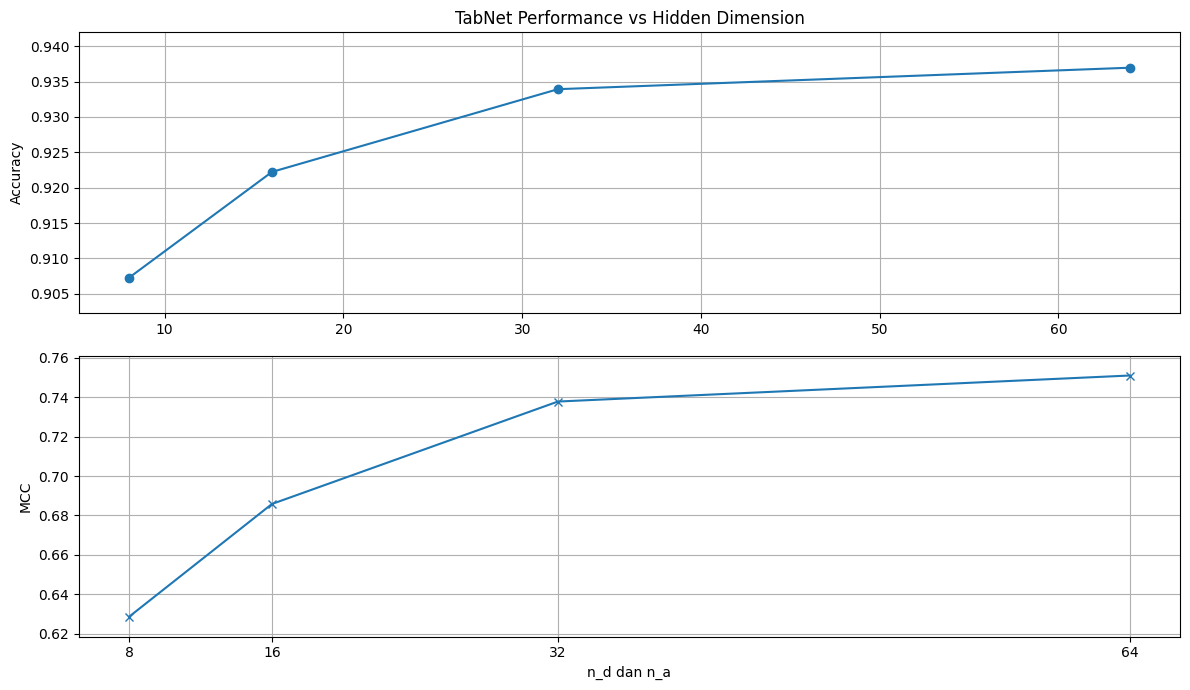

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))

# Plot Accuracy
plt.subplot(2, 1, 1)
plt.plot(n_d_a_list, mean_acc_tabnet, marker='o')
plt.title("TabNet Performance vs Hidden Dimension")
plt.ylabel("Accuracy")
plt.grid(True)
plt.ylim(min(mean_acc_tabnet) - 0.005, max(mean_acc_tabnet) + 0.005)

# Plot MCC
plt.subplot(2, 1, 2)
plt.plot(n_d_a_list, mean_mcc_tabnet, marker='x')
plt.xlabel("n_d dan n_a")
plt.ylabel("MCC")
plt.grid(True)
plt.ylim(min(mean_mcc_tabnet) - 0.01, max(mean_mcc_tabnet) + 0.01)

# Set X-ticks agar sesuai angka
plt.xticks(n_d_a_list)

plt.tight_layout()
plt.show()